# **Night Time Light analysis at 0.05x0.05 degree for India**

In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.use_inf_as_na = True
import numpy as np
import os
import math
from scipy.stats import pearsonr as corr
from matplotlib import pyplot as plt
#import statsmodels.api as sm
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
NTL_PATH="ntl/data/" #path for NTL data
COVID_PATH="covidoxford/data/" # path for covidoxford data
CITIES_PATH="cities/data/" # path for cities data

**Total 3418 cities**

In [ ]:
cities_df=pd.read_csv(CITIES_PATH+"cities_0.05degx0.05deg.csv",error_bad_lines=False)
cities_df['population'] = np.where(cities_df['population']==0,10000,cities_df['population'])
print("cities =",len(cities_df))

In [12]:
ntl_df=pd.read_csv(NTL_PATH+"indian_cities_0.05degx0.05deg_ntl.csv")

**Metric use: Gap_Filled_DNB_BRDF-Corrected_NTL**

In [13]:
metric="Gap_Filled_DNB_BRDF-Corrected_NTL"
metric_df=ntl_df[(ntl_df["metric"]==metric)&(ntl_df["mean"]>=0)&(ntl_df["mean"]<65535)&(~ntl_df["mean"].isna())]

In [ ]:
metric_df

,location,week,metric,mean,sdev,min,10p,25p,median,75p,90p,max
0,23.475#74.925,1.2019.week1,Gap_Filled_DNB_BRDF-Corrected_NTL,17,16,1,4,6,11,22,38,94
1,26.175#78.925,1.2019.week1,Gap_Filled_DNB_BRDF-Corrected_NTL,47,66,3,8,13,22,46,117,433
2,22.425#72.875,1.2019.week1,Gap_Filled_DNB_BRDF-Corrected_NTL,27,43,2,5,8,14,25,62,413
3,27.875#78.725,1.2019.week1,Gap_Filled_DNB_BRDF-Corrected_NTL,25,34,3,5,8,15,25,49,284
4,27.725#77.375,1.2019.week1,Gap_Filled_DNB_BRDF-Corrected_NTL,13,16,3,4,5,8,14,33,125
...,...,...,...,...,...,...,...,...,...,...,...,...
451303,23.375#79.025,9.2021.week4,Gap_Filled_DNB_BRDF-Corrected_NTL,12,14,1,3,4,7,13,31,87
451304,24.925#79.575,9.2021.week4,Gap_Filled_DNB_BRDF-Corrected_NTL,54,53,5,9,19,35,67,125,389
451305,25.225#77.625,9.2021.week4,Gap_Filled_DNB_BRDF-Corrected_NTL,17,20,1,4,5,9,23,47,99
451306,28.625#79.825,9.2021.week4,Gap_Filled_DNB_BRDF-Corrected_NTL,75,79,5,10,16,40,117,192,379


#**Weekwise average night time lights for 2019 and 2020**<br>
The captured data is daily and it is mapped to 8-day. So, 4 weeks a month. For 12 months of 2019 and average of every month (average of 4 weeks) is done. Same for 2020 is done.


In [14]:
x=[]
values1=[]
values2=[]
for month in range(1,13):
    for week in range(1,5):
        week1=str(month)+".2019.week"+str(week)
        week2=str(month)+".2020.week"+str(week)
        week1_data=metric_df[metric_df["week"]==week1].set_index("location")["mean"].to_dict()
        week2_data=metric_df[metric_df["week"]==week2].set_index("location")["mean"].to_dict()
        temp1=[]
        temp2=[]
        for location in week1_data:
            if location in week2_data:
                temp1.append(week1_data[location])
                temp2.append(week2_data[location])
        if len(temp1)>=3400:
            x.append((month-1)*4+week)
            values1.append(np.mean(temp1))
            values2.append(np.mean(temp2))
            print(" month =",month," week =",week,"2019 =",values1[-1],"2020 =",values2[-1])

 month = 1  week = 1 2019 = 49.458321146534075 2020 = 48.57853173442527
 month = 1  week = 2 2019 = 48.03656039777713 2020 = 48.56507750804329
 month = 1  week = 3 2019 = 50.400701959637324 2020 = 48.22082480257385
 month = 1  week = 4 2019 = 49.340157940918395 2020 = 48.33284586136297
 month = 2  week = 1 2019 = 47.78765720971044 2020 = 50.286341035390464
 month = 2  week = 2 2019 = 51.57092717168763 2020 = 50.72243346007605
 month = 2  week = 3 2019 = 50.10295408014039 2020 = 52.11436092424685
 month = 2  week = 4 2019 = 48.97894121088037 2020 = 49.17373501023691
 month = 3  week = 1 2019 = 50.18426440479672 2020 = 47.42585551330799
 month = 3  week = 2 2019 = 49.085697572389584 2020 = 49.41942088329921
 month = 3  week = 3 2019 = 48.541971336648146 2020 = 47.27522667446622
 month = 3  week = 4 2019 = 47.459198596080725 2020 = 46.420883299210296
 month = 4  week = 1 2019 = 47.585843813980695 2020 = 44.97338403041825
 month = 4  week = 2 2019 = 48.22725943258263 2020 = 43.649312664521

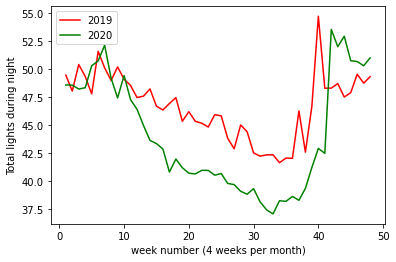

In [15]:
plt.plot(x,values1,label="2019",color="red")
plt.plot(x,values2,label="2020",color="green")
plt.legend()
plt.xlabel("week number (4 weeks per month)")
plt.ylabel("Total lights during night")
plt.show()

**Takeaway**: For both 2019 and 2020, from April, there is clear decline in night time lights. But for 2020, it is clearly higher compared to 2019. Towards the end of the year, the values for 2020 rise up again and become close to their 2019 counter parts.

There are two interesting things here:
1) The values are higher for colder months (longer nights)

2) The lowest point for 2020 coincides with the peak of the first wave in India. There seems to a correlation with covid-19 cases. However, we observe similar curve and lowest point is also at the same time. So, this might have nothing to do with covid-19 cases.

3) For both the years, the sudden rise after valley coincides with the Diwali week: 27th October,2019 (4th week of October) and 14th November,2020 (2nd week of November)

# **Comparing pre and post lockdown in 2020**<br>
The difference of night time light is taken for march 2nd week and april first week. 

In [16]:
week1="3.2020.week2"
week2="4.2020.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_post"]-week_df["mean_pre"])*100/week_df["mean_pre"]
week_df["diff"].describe()

count    3418.000000
mean       -4.348555
std        21.059036
min       -65.625000
25%       -14.473684
50%        -7.605415
75%         0.000000
max       521.428571
Name: diff, dtype: float64

Count for cities with population greater or equal to a million.

In [17]:
week_df[week_df["population"]>=1000000]["diff"].describe()

count    42.000000
mean    -10.856653
std       8.184662
min     -43.865031
25%     -14.627660
50%     -11.187145
75%      -5.302449
max       6.153846
Name: diff, dtype: float64

Cities with dip of 15% and with population of atleast a million are shown <br>
Cities with dip of 10% and with population of atleast a million are shown <br>
Cities with atleast a dip of 30%

In [18]:
print("--- cities with atleast a million population having atleast a dip of 10% ---")
print(week_df[(week_df["population"]>=1000000)&(week_df["diff"]<=-10)]["city"].tolist())
print("--- cities with atleast a million population having atleast a dip of 15% ---")
print(week_df[(week_df["population"]>=1000000)&(week_df["diff"]<=-15)]["city"].tolist())
print("--- cities having atleast a dip of 30% ---")
print(week_df[(week_df["diff"]<=-30)]["city"].tolist())

--- cities with atleast a million population having atleast a dip of 10% ---
['Allahabad', 'Varanasi', 'Kalyan', 'Pune', 'Aurangabad', 'Nashik', 'Navi Mumbai', 'Thane', 'Dombivli', 'Mumbai', 'Pimpri', 'Faridabad', 'Jabalpur', 'Rajkot', 'Bhopal', 'Ahmedabad', 'Jaipur', 'Nagpur', 'Indore', 'Chennai', 'Nowrangapur', 'Visakhapatnam']
--- cities with atleast a million population having atleast a dip of 15% ---
['Kalyan', 'Navi Mumbai', 'Thane', 'Mumbai', 'Jabalpur', 'Bhopal', 'Indore', 'Visakhapatnam']
--- cities having atleast a dip of 30% ---
['Husainabad', 'Garhwa', 'Beniganj', 'Mangan', 'Panna', 'Gondia', 'Bundu', 'Ghoti Budrukh', 'Murud', 'Serula', 'Aurad', 'Nileshwar', 'Saligao', 'Manor', 'Sringeri', 'Vagator', 'Lonavla', 'Harnai', 'Perya', 'Uran', 'Londa', 'Ponnampet', 'Daulatabad', 'Ashta', 'Wadi', 'Cavelossim', 'Jejuri', 'Koppa', 'Navelim', 'Someshwar', 'Igatpuri', 'Addanki', 'V.S.K.Valasai (Dindigul-Dist.)', 'Naduvannur', 'Calangute', 'Kodoli', 'Shirwal', 'Tawang', 'Sibsagar', 'Ka

**Takeaway**: In first week of April in 2020, compared to before lockdown, on an average 4.5% dip was observed with median dip being 7.5% across cities. 
Cities with atleast a million population saw 11% dip on an average.
Mumbai and Vishakhapatnam were among the populous cities which observed a dip of more than 15%.

The difference of night time light is taken for march 2nd week and may first week. 

In [19]:
week1="3.2020.week2"
week2="5.2020.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_post"]-week_df["mean_pre"])*100/week_df["mean_pre"]
week_df["diff"].describe()

count    3418.000000
mean      -16.405691
std        16.827291
min       -83.333333
25%       -25.000000
50%       -17.391304
75%        -9.677419
max       200.000000
Name: diff, dtype: float64

Count for cities with population greater or equal to a million.

In [ ]:
week_df[week_df["population"]>=1000000]["diff"].describe()

count    42.000000
mean    -17.967543
std       9.018450
min     -47.727273
25%     -23.322422
50%     -17.705027
75%     -13.455469
max      11.111111
Name: diff, dtype: float64

Cities with dip of 15% and with population of atleast a million are shown <br>
Cities with dip of 20% and with population of atleast a million are shown <br>
Cities with atleast a dip of 50%

In [ ]:
print("--- cities with atleast a million population having atleast a dip of 10% ---")
print(week_df[(week_df["population"]>=1000000)&(week_df["diff"]<=-10)]["city"].tolist())
print("--- cities with atleast a million population having atleast a dip of 20% ---")
print(week_df[(week_df["population"]>=1000000)&(week_df["diff"]<=-20)]["city"].tolist())
print("--- cities having atleast a dip of 50% ---")
print(week_df[(week_df["diff"]<=-50)]["city"].tolist())

--- cities with atleast a million population having atleast a dip of 10% ---
['Allahabad', 'Lucknow', 'Patna', 'Haora', 'Kolkata', 'Varanasi', 'Kanpur', 'Kalyan', 'Pune', 'Aurangabad', 'Nashik', 'Navi Mumbai', 'Hyderabad', 'Thane', 'Bengaluru', 'Dombivli', 'Mumbai', 'Pimpri', 'Teni', 'Faridabad', 'Jabalpur', 'Meerut', 'Surat', 'Rajkot', 'Bhopal', 'Ahmedabad', 'Vadodara', 'Ghaziabad', 'Agra', 'Jaipur', 'Najafgarh', 'Nagpur', 'Delhi', 'Indore', 'Ludhiana', 'Amritsar', 'Chennai', 'Nowrangapur', 'Visakhapatnam']
--- cities with atleast a million population having atleast a dip of 20% ---
['Allahabad', 'Varanasi', 'Kanpur', 'Kalyan', 'Navi Mumbai', 'Thane', 'Mumbai', 'Teni', 'Faridabad', 'Jabalpur', 'Bhopal', 'Ghaziabad', 'Delhi', 'Indore', 'Nowrangapur', 'Visakhapatnam']
--- cities having atleast a dip of 50% ---
['Musafir-Khana', 'Chandla', 'Bighapur Khurd', 'Mohanpur', 'Baduria', 'Jagdishpur', 'Jarwal', 'Dighwara', 'Murud', 'Vagator', 'Harnai', 'Suntikoppa', 'Kannavam', 'Ramapuram', 'Som

**Take away** First week of May saw around 17% dip compared to pre-lockdown period. Populous cities with a million people and higher experienced around 18% dip. Some of the populous cities with more than 20% dip were Allahabad, Varanasi, Delhi, Mumbai, Vishakhapatnam, Kanpur, Ghaziabad, Indore, Faridabad and Jabalpur.